In [10]:
!pip install numpy

#### Создание массивов и их свойства

In [29]:
import numpy as np

arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.zeros(5)
arr3 = np.ones((2,3)) # двумерный массив
arr4 = np.arange(0,10,2)

# Свойства массивов numpy
arr = np.array([[1,2,3],[4,5,6]])

print("Размерность:", arr.ndim)
print("Форма:", arr.shape)
print("Тип данных:", arr.dtype)

Размерность: 2
Форма: (2, 3)
Тип данных: int64


#### Арифметические операции

In [30]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

print(arr1 + arr2)
print(arr1 * 2)

[5 7 9]
[2 4 6]


#### Индексация и срезы

In [31]:
arr = np.array([0, 1, 2, 3, 4, 5])

print(arr[0])
print(arr[1:4])
print(arr[::-1]) # обратный порядок

0
[1 2 3]
[5 4 3 2 1 0]


#### Векторизация (проверим скорость выполнения с библиотекой time)

In [32]:
import time

arr = np.arange(1,10000000)

start_time = time.time()

result = []
for i in arr:
    result.append(i ** 2)
    
end_time = time.time()
print("Время выполнения без векторизации: {:.6f} секунд".format(end_time - start_time))

start_time = time.time()

result_vectorized = arr ** 2

end_time = time.time()
print("Время выполнения с векторизацией: {:.6f} секунд".format(end_time - start_time))

Время выполнения без векторизации: 1.775138 секунд
Время выполнения с векторизацией: 0.027206 секунд


#### Работа с массивами изображений

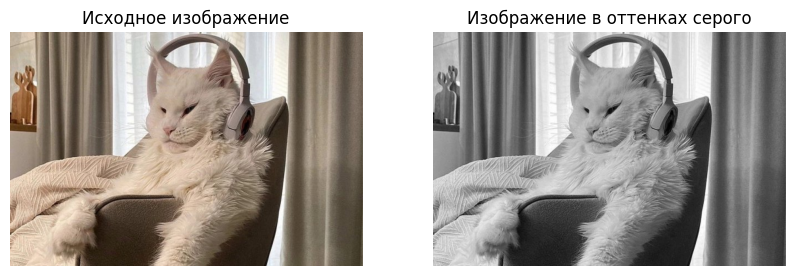

In [40]:
import matplotlib.pyplot as plt

image = plt.imread("image.jpg")

gray_image = np.mean(image, axis = 2)

plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й график
plt.imshow(image)
plt.title("Исходное изображение")
plt.axis("off")  # Отключение осей

# Отображение преобразованного изображения
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-й график
plt.imshow(gray_image, cmap="gray")
plt.title("Изображение в оттенках серого")
plt.axis("off")  # Отключение осей

plt.show()

#### Моделирование броска монеты

In [51]:
number_of_flips = 1000
flips = np.random.randint(0,2, size = number_of_flips)
num_heads = np.sum(flips == 0)
num_tails = number_of_flips - num_heads

print(f"Количество орлов (0): {num_heads} ({num_heads / len(flips) * 100:.2f}%)")
print(f"Количество решек (1): {num_tails} ({num_tails / len(flips) * 100:.2f}%)")

Количество орлов (0): 531 (53.10%)
Количество решек (1): 469 (46.90%)


### Дополнительное задание (реализация линейной регресси с использованием numpy)

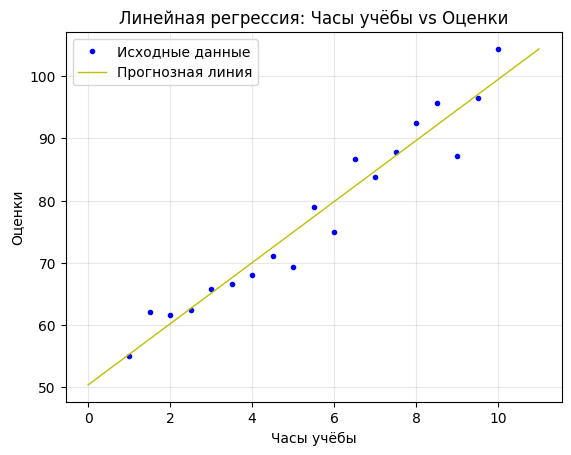

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)  # Для воспроизводимости
x = np.array([[1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5], 
              [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0]]) 
y = 50 + 5 * x + np.random.normal(0, 5, size=x.shape)  # Линейная зависимость с шумом

# Добавление единичного столбца для свободного члена (бета_0)
x_b = np.c_[np.ones((x.shape[0], 1)), x]

# Вычисление коэффициентов линейной регрессии с использованием метода нормальных уравнений
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Предсказания
x_new = np.array([[0], [11]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)

# Визуализация данныx
plt.plot(x, y, "b.", label="Исходные данные")  # Исходные данные с шумом
plt.plot(x_new, y_predict, "y", label="Прогнозная линия", linewidth=1)  # Линия регрессии
plt.xlabel("Часы учёбы")
plt.ylabel("Оценки")
plt.title("Линейная регрессия: Часы учёбы vs Оценки")
plt.legend()
plt.grid(True, alpha=0.3)  # Сетка с пунктирной линией
plt.show()